In [1]:
from google.colab import files
uploaded = files.upload()  # A window will open to select a file on your computer

Saving Dataset ITU.zip to Dataset ITU.zip


Unpacking

In [2]:
import zipfile
import os

zip_path = 'Dataset ITU.zip'  # File name, as a string

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  # Extract to the extracted_data folder

# Let's check what's unpacked
print(os.listdir('extracted_data'))

['Dataset ITU']


Cleaning and filtering CSV data, removing rows with many missing values, and removing duplicate rows.

In [16]:
import os
import pandas as pd
import zipfile

folder_path = 'extracted_data/Dataset ITU'
clean_folder = 'cleaned_data'
output_zip = 'cleaned_datasets.zip'

def count_zeros_dashes_and_na(row):
    zero_count = (row == "0").sum()
    dash_count = (row == "-").sum()
    na_count = row.isna().sum()
    return zero_count + dash_count + na_count

os.makedirs(clean_folder, exist_ok=True)

# Deleting old files without '1' in the name
for f in os.listdir(clean_folder):
    if '1' not in f and f.endswith('.csv'):
        os.remove(os.path.join(clean_folder, f))

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # Counting "bad" values in rows (except for the first column with names)
        df['count_zero_dash_na'] = df.iloc[:, 1:].apply(count_zeros_dashes_and_na, axis=1)

        # Filtering rows with a sum <= 8
        df_filtered = df[df['count_zero_dash_na'] <= 8]

        # Cleaning: Removing duplicate rows
        df_filtered = df_filtered.drop_duplicates()


        # Validation: displaying statistics about NaNs and duplicates
        na_count = df_filtered.isna().sum().sum()
        duplicates_count = df_filtered.duplicated().sum()
        print(f'File {filename}: source strings {len(df)}, after filtering {len(df_filtered)}')
        print(f'The number of missing values after filtering: {na_count}')
        print(f'Number of duplicate rows after filtering: {duplicates_count}')
        print('Remaining countries:', df_filtered['Economy'].to_list())
        print('---------------------')

        name, ext = os.path.splitext(filename)
        new_name = f"{name}1{ext}"

        clean_file_path = os.path.join(clean_folder, new_name)
        df_filtered.to_csv(clean_file_path, index=False)

# Creating a ZIP archive with new files
with zipfile.ZipFile(output_zip, 'w') as zipf:
    for filename in os.listdir(clean_folder):
        file_path = os.path.join(clean_folder, filename)
        zipf.write(file_path, arcname=filename)

print(f'ZIP file with cleaned data has been created: {output_zip}')


File Environment & e-waste mandates and legal framework.csv: source strings 1015, after filtering 231
The number of missing values after filtering: 0
Number of duplicate rows after filtering: 0
Remaining countries: ['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Bahamas', 'Bahamas', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Bosnia and Herzegovina', 'Bosnia and Herzegovina', 'Bosnia and Herzegovina', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Colombia', 'Colombia', 'Cyprus', 'Cyprus', 'Cyprus', 'Cyprus', 'Egypt', 'Finland', 'Finland', 'Finland', 'France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Guatemala', 'Guatemala', 'Guatemala', 'Hong Kong, China', 'Hong Kong, China', 'Hong Kong, China', 'Hong Kong, China', 'Iceland', 'Iceland', 'Iceland', 'India', 'India', 'Ind

Combining it into one dataset

In [17]:
import os
import pandas as pd

clean_folder = 'cleaned_data'

# Get a list of all csv files in the folder
files = [f for f in os.listdir(clean_folder) if f.endswith('.csv')]

# Read each file into a DataFrame and save it to a list
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(clean_folder, file))
    dfs.append(df)
# Combine all the DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True, sort=False)

# As an optional post-processing step, you can remove duplicates
combined_df = combined_df.drop_duplicates()

# Save the merged data frame to a new file
combined_output_path = os.path.join(clean_folder, 'combined_all_years.csv')
combined_df.to_csv(combined_output_path, index=False)

print(f'A combined file has been created: {combined_output_path}')


A combined file has been created: cleaned_data/combined_all_years.csv


Удаляем ненужные данные

In [23]:
import pandas as pd
import numpy as np

file_path = 'cleaned_data/combined_all_years.csv'
df = pd.read_csv(file_path)

# Replace the strings 'nan', 'NaN', and empty strings with NaN
df['Indicator'] = df['Indicator'].replace(['nan', 'NaN', ''], np.nan)

# Remove rows with NaN in the 'Indicator' column
df.dropna(subset=['Indicator'], inplace=True)

# List of indicators to delete
indicators_to_remove = [
    'Other reason',
    'Cultural reasons',
    'Who regulates issues related to the Internet of Things?',
    'Is the Regulatory Authority a collegial body?',
    'At least once a day',
    'Less than once a week',
    'At least once a week but not every day',
    "Who's responsible for implementation of mitigation measures for e-waste/ obsolete ICT equipment (e.g., recycling/disposal facilities or eco-design)",
    "If the ICT Regulatory Authority is a collegial body, what is the total number of members/commissioners (including the Head)?",
    "Number of female members",
    "Is the Head of the Commission also responsible for day-to-day administrative matters?",
    "Is there a billing framework to support charging mechanisms for IoT services and applications?",
    "Information on licensing process",
    "Sanctions for non-conformance with QoS requirements exist",
    "Sanctions for non-conformance with QoS requirements applied",
    "Frequency arrangements (Band Plans)",
    "Significant reforms planned on IoT/M2M",
    "International Gateways",
    "Responsibility for handling consumer complaints",
    "Responsibility for consumer education",
    "Responsibility for ensuring consumer participation in the work of regulator",
    "Responsibility for supporting consumer representation",
    "Responsibility for providing comparable tariff information",
    "Environment agency ",
    "Legal instrument where the provision of e-waste is defined",
    "Mechanisms of collaboration with the ICT regulator",
    "Jurisdiction over e-waste",
    "Games toys and hobbies",
    "Internet of Things (IoT) regulations",
    "Other Government Ministry or agency mandates",
    "Separate regulatory entity for e-waste exist",
    "Cloud computing policies",
    "National entity responsible for cloud computing",
    "National strategy, policy or initiative focusing on emerging technologies",
    "Information on licensing agreements",
    "Information on licensing requests",
    "Allowed foreign ownership in Value-added service providers",
    'ICT consumer protection legislation',
    'Regulatory framework for e-Applications',
    'ICT Regulator responsible for e-Applications',
    'National Emergency Telecommunications Plan adopted',
    'Regulatory or legislative framework on emergency telecommunications',
    'Internet recognized as a legal right',
    'Restriction to foreign participation or ownership in the ICT sector',
    'Legal act that addresses foreign participation and ownership in ICTs',
    'Other entity responsible for e-Applications',
    "ICT regulator's mandate",
    'Measure or initiatives for implementing the National Emergency Telecommunications Plan',
    'Provisions for foreign suppliers/licensees',
    'Regulatory treatment of foreign providers',
    'Allowed foreign ownership in Internet Service Providers (ISPs)',
    'Allowed foreign ownership in facilities-based operators',
    'Allowed foreign ownership in international service operators',
    'Allowed foreign ownership in local service operators',
    'Allowed foreign ownership in other operators',
    'Allowed foreign ownership in long-distance service operators',
    'Allowed foreign ownership in spectrum-based operators',
    'Are operators taken any measures to reduce the risk of bill shock',
    'Broader regulatory incentives for telecom/ICT operators',
    'BSS (Satellite TV)'
]

# Remove all indicator lines from the list
df = df[~df['Indicator'].isin(indicators_to_remove)]

# Save the cleaned DataFrame back to CSV
df.to_csv(file_path, index=False)

# Check that the required indicators are removed
print("Remaining rows with 'Other reason':")
print(df[df['Indicator'] == 'Other reason'])
print("Updated combined_all_years.csv saved.")


Remaining rows with 'Other reason':
Empty DataFrame
Columns: [Economy, Indicator, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, count_zero_dash_na]
Index: []
Updated combined_all_years.csv saved.


Interim information


In [25]:
import pandas as pd

file_path = 'cleaned_data/combined_all_years.csv'

# Uploading data
df = pd.read_csv(file_path)

# Output of basic information about the dataset
print(df.info())

# Counting the number of unique countries in the 'Economy' column
unique_countries_count = df['Economy'].nunique()
print(f'Total unique countries in the dataset: {unique_countries_count}')
# Display all unique indicators from the 'Indicator' column
unique_indicators = df['Indicator'].unique()
print(f'Total unique indicators: {len(unique_indicators)}')
print('All the unique indicators in the dataset:')
for indicator in unique_indicators:
    print(indicator)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451 entries, 0 to 6450
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Economy             6451 non-null   object
 1   Indicator           6451 non-null   object
 2   2014                6059 non-null   object
 3   2015                6056 non-null   object
 4   2016                6065 non-null   object
 5   2017                6079 non-null   object
 6   2018                6416 non-null   object
 7   2019                6419 non-null   object
 8   2020                6439 non-null   object
 9   2021                6439 non-null   object
 10  2022                6436 non-null   object
 11  2023                6451 non-null   object
 12  2024                6451 non-null   object
 13  2025                6451 non-null   object
 14  count_zero_dash_na  6451 non-null   int64 
dtypes: int64(1), object(14)
memory usage: 756.1+ KB
None
Total unique countr

Splitting into groups

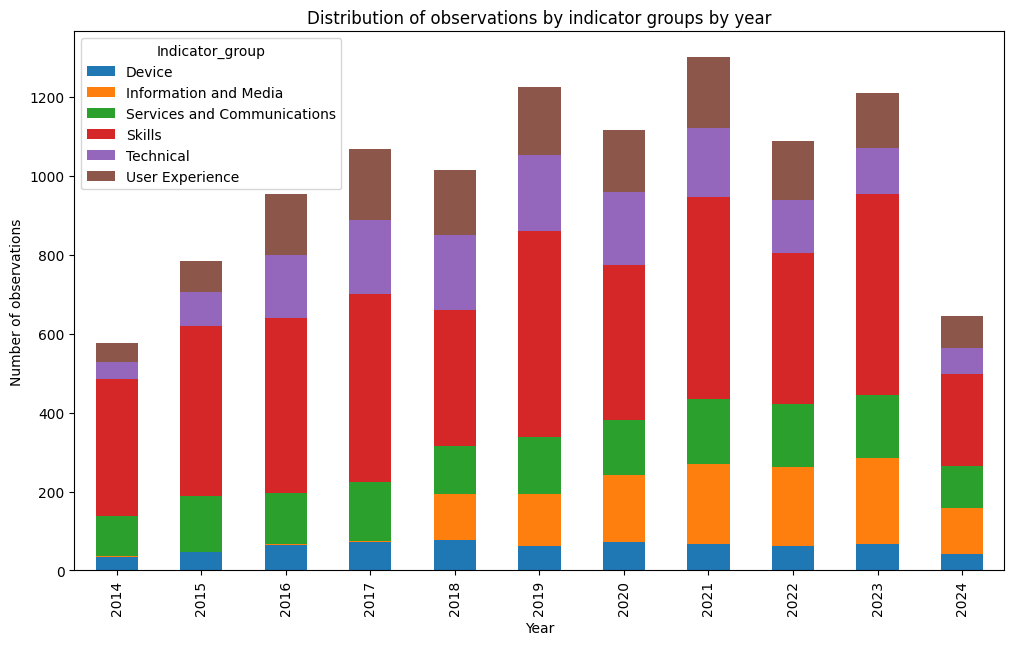

The final cleaned and prepared dataset is saved in'cleaned_final_dataset.csv'


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = 'cleaned_data/combined_all_years.csv'
df = pd.read_csv(file_path)

# Converting from wide to long format
df_long = pd.melt(df, id_vars=['Economy', 'Indicator'], var_name='Year', value_name='Value')

df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long = df_long.dropna(subset=['Year'])
df_long['Year'] = df_long['Year'].astype(int)

def to_numeric_percent(x):
    if isinstance(x, str):
        x = x.replace('%', '').replace('-', '').strip()
    try:
        return float(x)
    except:
        return None

df_long['Value'] = df_long['Value'].apply(to_numeric_percent)

# Deleting rows with gaps in the 'Value' or 'Indicator' columns
df_long.dropna(subset=['Value', 'Indicator'], inplace=True)

# Removing duplicates across all columns
df_long.drop_duplicates(inplace=True)


le = LabelEncoder()
df_long['Indicator_encoded'] = le.fit_transform(df_long['Indicator'])
df_long['Economy_encoded'] = le.fit_transform(df_long['Economy'])


def get_indicator_group(indicator):
    # Extended groups
    device_indicators = ['Desktop computer', 'Laptop computer', 'Tablet']

    skill_indicators = [
        'Changing privacy settings on your device, account or app',
        'Setting up effective security measures to protect devices and accounts',
        'Doing an online course',
        'Internet banking',
        'Purchasing or ordering goods or services',
        'Finding, downloading, installing and configuring software',
        'Transferring files between a computer and other devices',
        'Using copy and paste tools within a document',
        'Creating electronic presentations with presentation software',
        'Writing a computer program using a programming language',
        'Digital content creation',
        'Using basic arithmetic formula in a spreadsheet',
        'Using software run over the Internet for editing text documents, spreadsheets or presentations',
        'Individuals with basic ICT skills in information and data literacy',
        'Individuals with above basic ICT skills in information and data literacy',
        'Individuals with basic ICT skills in digital content creation',
        'Individuals with above basic ICT skills in digital content creation',
        'Individuals with basic skills in communication and collaboration',
        'Individuals with above basic ICT skills in communication and collaboration',
        'Individuals with basic ICT skills in problem solving',
        'Individuals with above basic ICT skills in problem solving',
        'Individuals with basic ICT skills in safety',
        'Individuals with above basic ICT skills in safety',
        'Connecting and installing new devices'
    ]

    regulatory_indicators = [
        'Allowed foreign ownership in Value-added service providers',
        'Price regulation of retail voice services',
        'Price regulation of retail SMS',
        'Price regulation of national retail roaming services (voice, SMS)',
        'Price regulation of international retail roaming services (voice, SMS)',
        'Price regulation of retail Internet access and data services',
        'Price regulation of retail data roaming (Internet connection) services',
        'Price regulation of retail mobile calling cards',
        'Broader regulatory incentives for telecom/ICT operators',
        'Separate ICT regulator',
        'Information on licensing requests',
        'Infrastructure sharing for mobile practiced'
    ]

    technical_indicators = [
        'Cable modem',
        'Cable Television',
        'Domestic fixed long distance',
        'Fixed satellite services (FSS)',
        'Fixed Wireless Broadband',
        'International fixed long distance',
        'Internet services',
        'Leased Lines',
        'Wireless Local Loop',
        'Local fixed line services',
        'Mobile',
        'Mobile satellite services (MSS)',
        'VSAT',
        'DSL',
        'Mobile Broadband',
        'Fibre',
        'Significant reforms planned on IoT/M2M',
        'By broadband',
        'By fixed broadband network only',
        'By mobile broadband network only',
        'By fixed broadband and mobile broadband network',
        'By fixed narrowband network',
        'By fixed (wired) broadband',
        'By mobile broadband network via a handset',
        'By mobile broadband network via a card or USB modem',
        'By satellite broadband network',
        'By terrestrial fixed (wireless) broadband network',
        'Digital Dividend spectrum reallocated',
        'Digital dividend spectrum for PPDR mobile services',
        'Services using digital dividend spectrum',
        'Quality of service monitoring required',
        'Services subject to QoS monitoring'
    ]

    user_experience_indicators = [
        'Do not need the Internet',
        'Do not know how to use it',
        'Cost of Internet use is too high',
        'Privacy or security concerns',
        'Don’t know what Internet is',
        'Not allowed to use the Internet',
        'Internet service is not available in the area',
        'Lack of local content',
        'Cost of the equipment is too high',
        'Cost of service is too high',
        'Internet service is available but it does not correspond to household needs',
        'No electricity in the household',
        'Have access to the Internet elsewhere',
        'Overlapping mandates'
    ]

    services_communications_indicators = [
        'Making calls using VoIP or messaging app',
        'Participating in social networks',
        'Taking part in online consultations or voting to define civic or political issues',
        'Sending e-mails with attached files',
        'International mobile roaming services available',
        'Retail international mobile roaming prices regulated',
        'Wholesale international mobile roaming prices regulated',
        'ICT Regulator collecting international mobile roaming retail tariff data',
        'International mobile roaming services are part of the mobile package',
        'Self-regulatory or commercial offers proposed by operators',
        'ICT Regulator collecting international mobile roaming wholesale tariff data'
    ]

    information_media_indicators = [
        'Verifying the reliability of information found online',
        'Seeking health information',
        'Reading or downloading newspapers, magazines or books',
        'Getting information about goods or services',
        'Information and communication services',
        'Information and communication equipment',
        'Software excluding games and computer software packages',
        'Getting information about goods or services',
        'Verifying the reliability of information found online'

    ]

    if indicator in device_indicators:
        return 'Device'
    elif indicator in skill_indicators:
        return 'Skills'
    elif indicator in regulatory_indicators:
        return 'Regulatory'
    elif indicator in technical_indicators:
        return 'Technical'
    elif indicator in user_experience_indicators:
        return 'User Experience'
    elif indicator in services_communications_indicators:
        return 'Services and Communications'
    elif indicator in information_media_indicators:
        return 'Information and Media'
    else:
        return 'Other'


df_long['Indicator_group'] = df_long['Indicator'].apply(get_indicator_group)
# A numeric code for each indicator group
df_long['Indicator_group_code'] = pd.factorize(df_long['Indicator_group'])[0]


count_by_year_group = df_long.groupby(['Year', 'Indicator_group']).size().unstack(fill_value=0)


count_by_year_group.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Distribution of observations by indicator groups by year')
plt.ylabel('Number of observations')
plt.xlabel('Year')
plt.show()

# Save the final dataset to CSV without indexes
df_long.to_csv('cleaned_final_dataset.csv', index=False)

print("The final cleaned and prepared dataset is saved in'cleaned_final_dataset.csv'")



Checking for missing or empty numbers

In [51]:
import pandas as pd

# Uploading a dataset
df = pd.read_csv('cleaned_final_dataset.csv')

# Counting the number of passes for each column
missing_counts = df.isnull().sum()

# General gaps in the entire data frame
total_missing = missing_counts.sum()

print("Missing columns:")
print(missing_counts)

print(f"\nThe total number of missing values in the entire dataset: {total_missing}")


Missing columns:
Economy                 0
Indicator               0
Year                    0
Value                   0
Indicator_encoded       0
Economy_encoded         0
Indicator_group         0
Indicator_group_code    0
dtype: int64

The total number of missing values in the entire dataset: 0


Information about the final dataset

In [56]:
import pandas as pd

# Uploading a dataset
df = pd.read_csv('cleaned_final_dataset.csv')


# Grouping by years and indicator groups, with a count of the number of entries in each group
grouped = df.groupby(['Year', 'Indicator_group']).size().unstack(fill_value=0)
grouped_indicators = df_long.groupby('Indicator_group')['Indicator'].unique()

for group, indicators in grouped_indicators.items():
    print(f"Group: {group}")
    for ind in sorted(indicators):
        print(f" - {ind}")
    print()

print(grouped)

Group: Device
 - Desktop computer
 - Laptop computer
 - Tablet

Group: Information and Media
 - Getting information about goods or services
 - Information and communication equipment
 - Information and communication services
 - Reading or downloading newspapers, magazines or books
 - Seeking health information
 - Software excluding games and computer software packages
 - Verifying the reliability of information found online

Group: Services and Communications
 - Making calls using VoIP or messaging app
 - Participating in social networks
 - Sending e-mails with attached files
 - Taking part in online consultations or voting to define civic or political issues

Group: Skills
 - Changing privacy settings on your device, account or app
 - Connecting and installing new devices
 - Creating electronic presentations with presentation software
 - Digital content creation
 - Doing an online course
 - Finding, downloading, installing and configuring software
 - Individuals with above basic ICT s

Analysis of user_experience_indicators

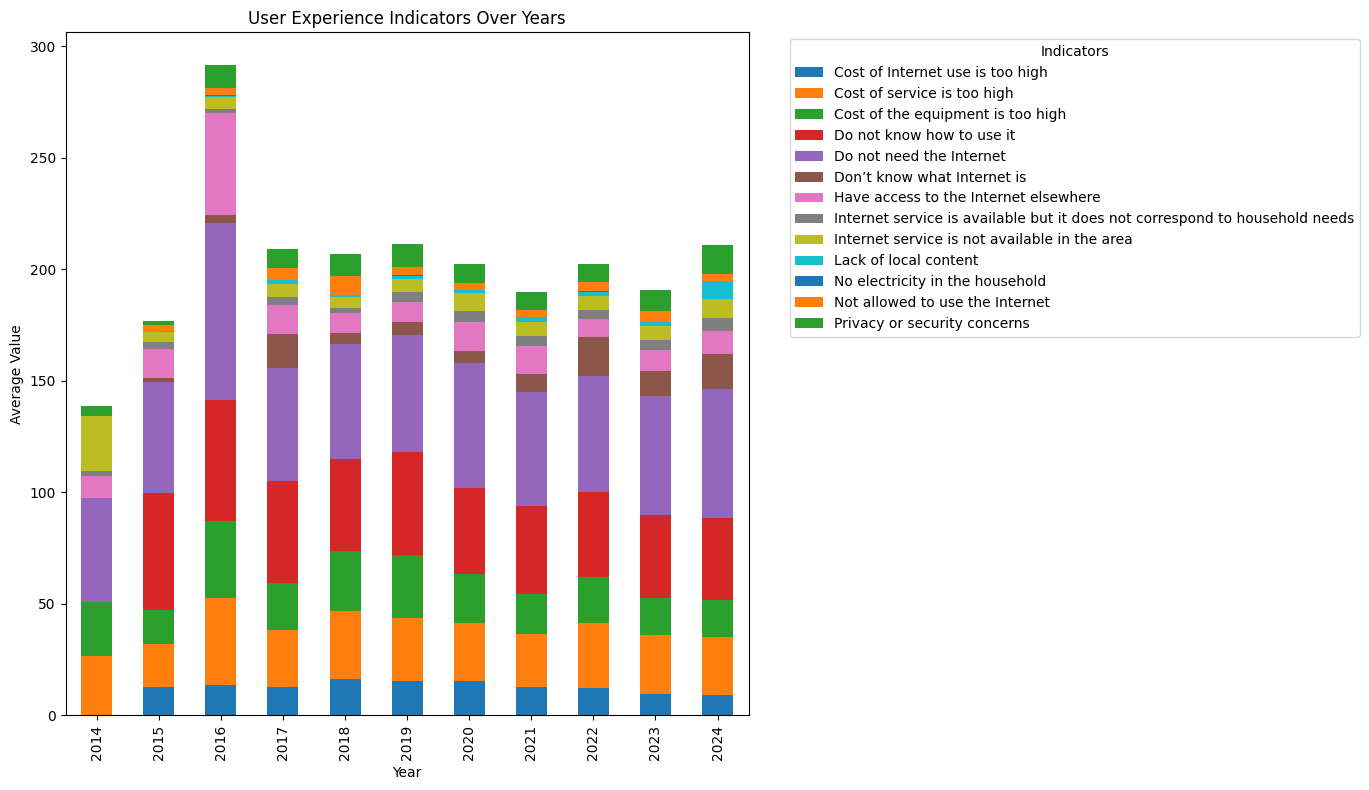

In [54]:
"""
This script analyzes User Experience indicators over multiple years.

Steps:
1. Load the dataset from CSV.
2. Define a list of User Experience related indicators.
3. Filter the dataset for these indicators.
4. Create a pivot table grouping by Year and Indicator, aggregating by average values.
5. Plot a stacked bar chart to visualize how User Experience indicators change over time.

The resulting plot helps interpret changes and trends in various user experience-related metrics.
"""

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cleaned_final_dataset.csv')

# List of User Experience indicators to filter on
user_experience_indicators = [
    'Cost of Internet use is too high',
    'Cost of service is too high',
    'Cost of the equipment is too high',
    'Do not know how to use it',
    'Do not need the Internet',
    'Don’t know what Internet is',
    'Have access to the Internet elsewhere',
    'Internet service is available but it does not correspond to household needs',
    'Internet service is not available in the area',
    'Lack of local content',
    'No electricity in the household',
    'Not allowed to use the Internet',
    'Privacy or security concerns'
]

# Filter rows based on indicators
df_ux = df[df['Indicator'].isin(user_experience_indicators)]

# Create pivot table: average Value by Year and Indicator
pivot_ux = df_ux.pivot_table(index='Year', columns='Indicator', values='Value', aggfunc='mean')

# Plot stacked bar chart for User Experience indicators over years
pivot_ux.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('User Experience Indicators Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


device_indicators analysis

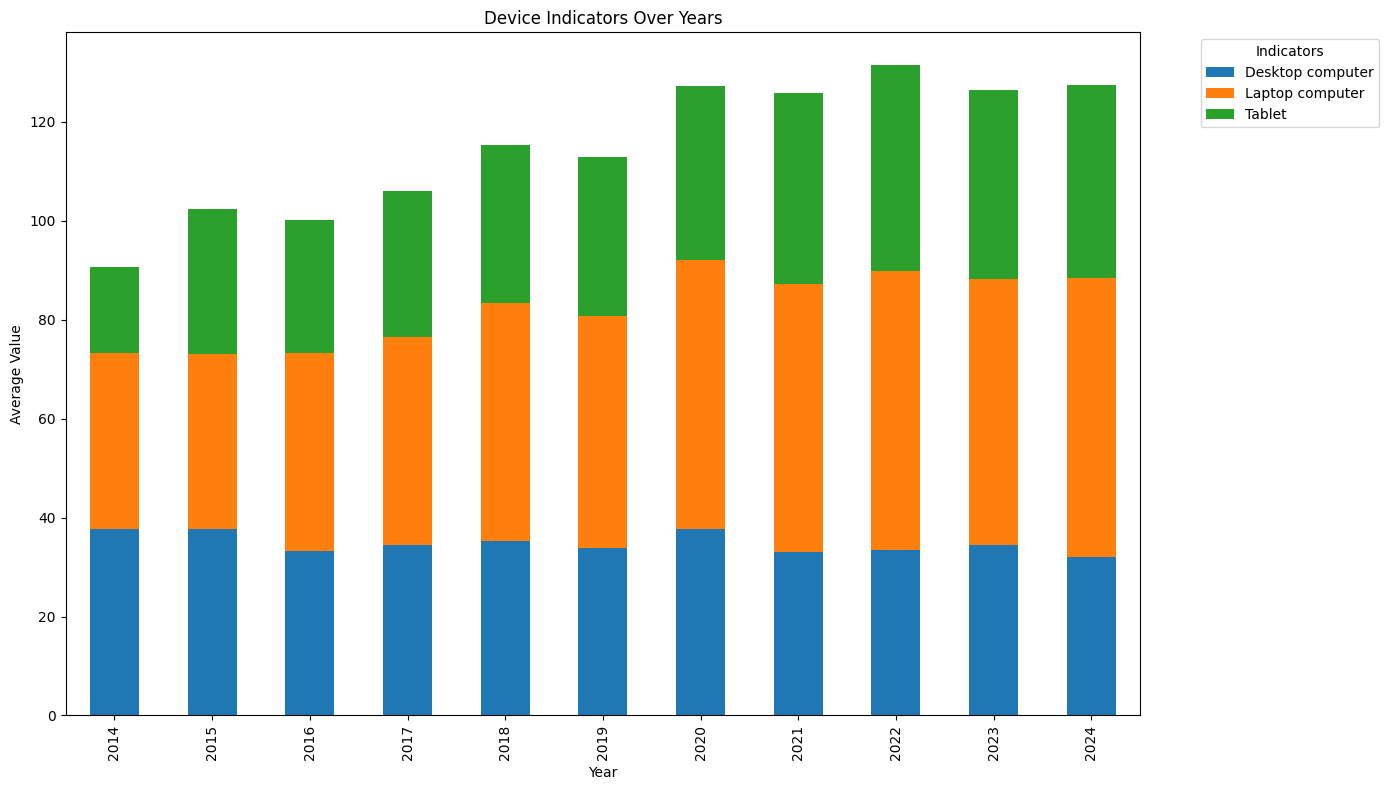

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Uploading a dataset
df = pd.read_csv('cleaned_final_dataset.csv')

# List of Device group indicators
device_indicators = [
    'Desktop computer',
    'Laptop computer',
    'Tablet'
]

# Filtering data by Device group indicators
df_device = df[df['Indicator'].isin(device_indicators)]

# Creating a pivot table with years and average values
pivot_device = df_device.pivot_table(index='Year', columns='Indicator', values='Value', aggfunc='mean')

# Building a stacked bar chart
pivot_device.plot(kind='bar', stacked=True, figsize=(14,8))

plt.title('Device Indicators Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Group: Information and Media

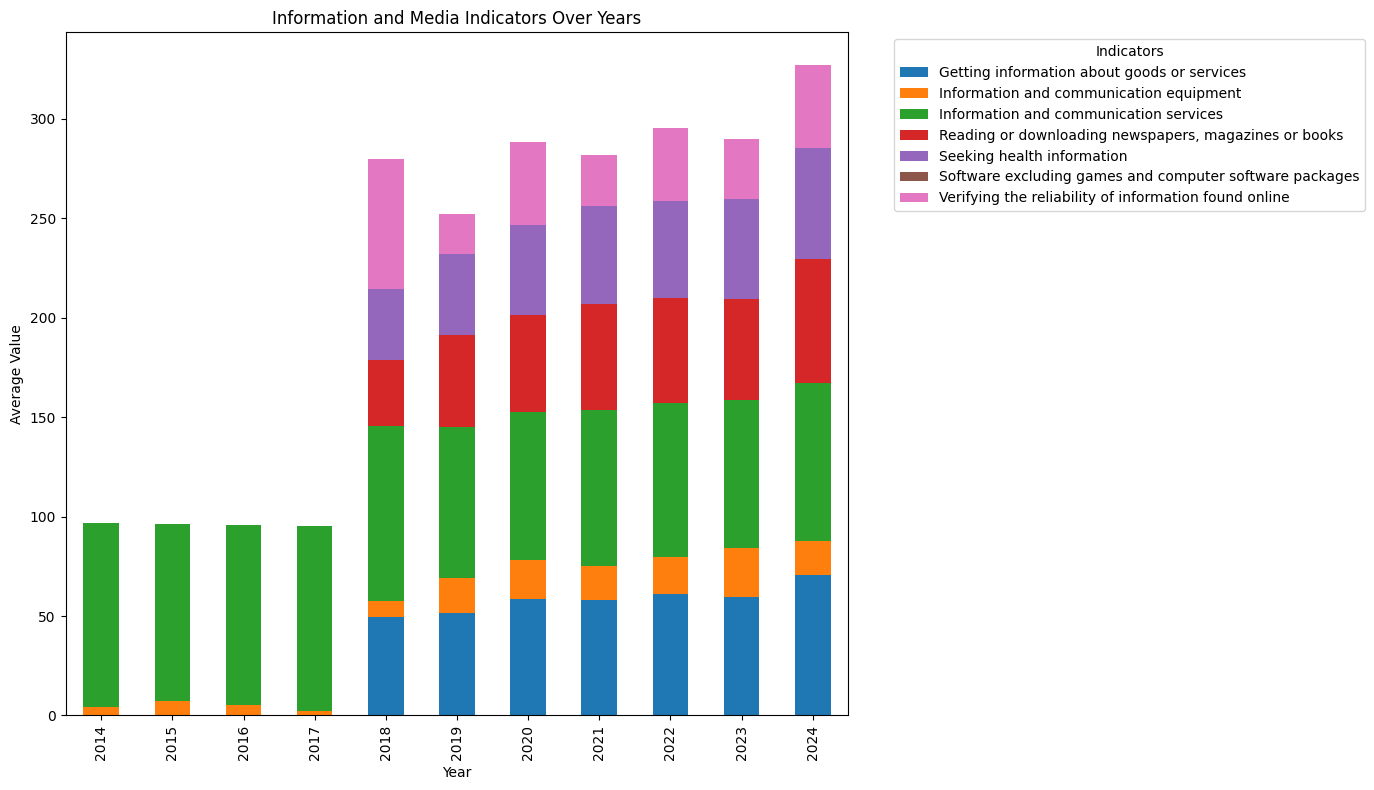

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('cleaned_final_dataset.csv')

# Loading the dataset # List of indicators for the Information and Media group
info_media_indicators = [
    'Getting information about goods or services',
    'Information and communication equipment',
    'Information and communication services',
    'Reading or downloading newspapers, magazines or books',
    'Seeking health information',
    'Software excluding games and computer software packages',
    'Verifying the reliability of information found online'
]
# Filtering the dataset by these indicators
df_info_media = df[df['Indicator'].isin(info_media_indicators)]

# Создаём сводную таблицу с годами и средними значениями
pivot_info_media = df_info_media.pivot_table(index='Year', columns='Indicator', values='Value', aggfunc='mean')

# Building a stacked bar chart
pivot_info_media.plot(kind='bar', stacked=True, figsize=(14,8))

plt.title('Information and Media Indicators Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Analysis of services_comm_indicators

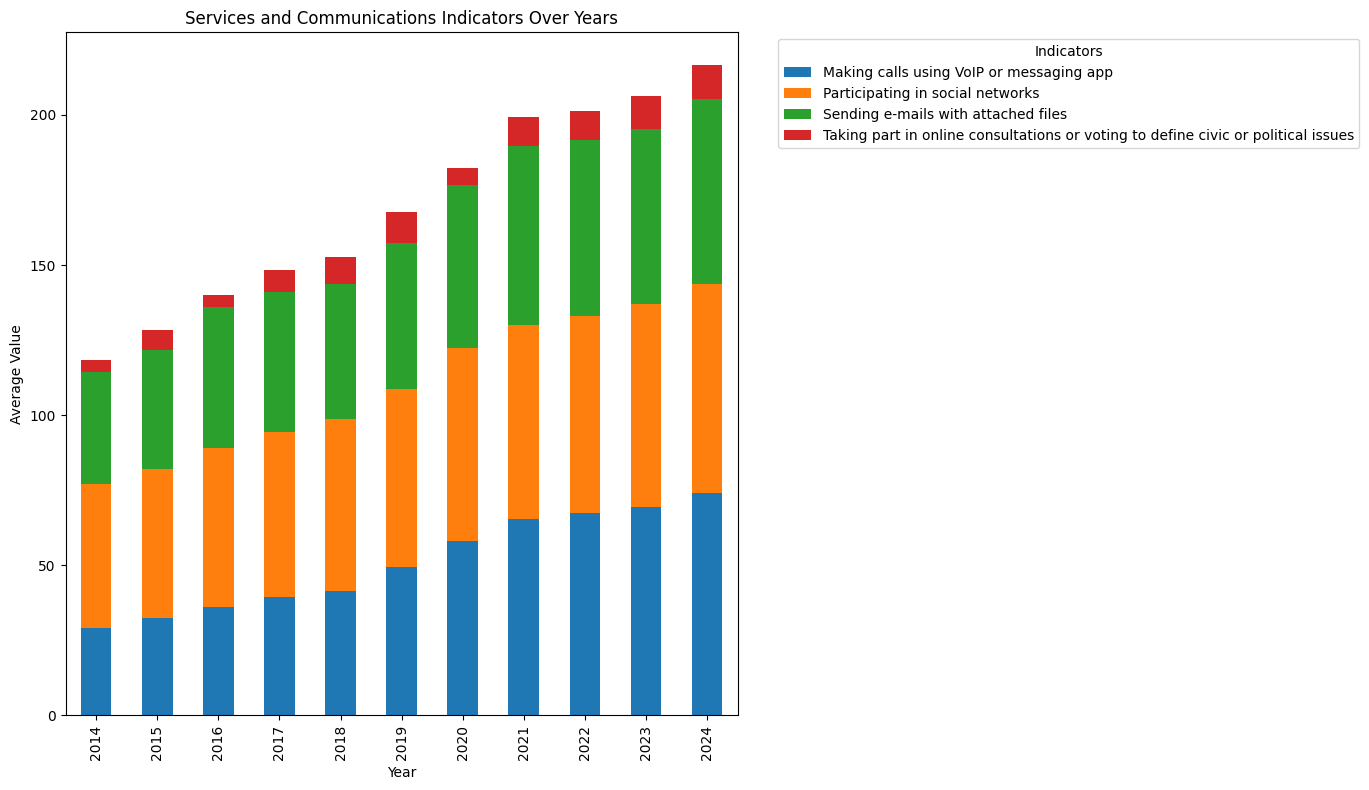

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Uploading a dataset
df = pd.read_csv('cleaned_final_dataset.csv')

# List of indicators for the Services and Communications group
services_comm_indicators = [
    'Making calls using VoIP or messaging app',
    'Participating in social networks',
    'Sending e-mails with attached files',
    'Taking part in online consultations or voting to define civic or political issues'
]

# Filtering by specified indicators
df_services_comm = df[df['Indicator'].isin(services_comm_indicators)]

# Creating a pivot table with years and average values for each indicator
pivot_services_comm = df_services_comm.pivot_table(index='Year', columns='Indicator', values='Value', aggfunc='mean')

# Building a stacked bar chart
pivot_services_comm.plot(kind='bar', stacked=True, figsize=(14,8))

plt.title('Services and Communications Indicators Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Skills Analysis

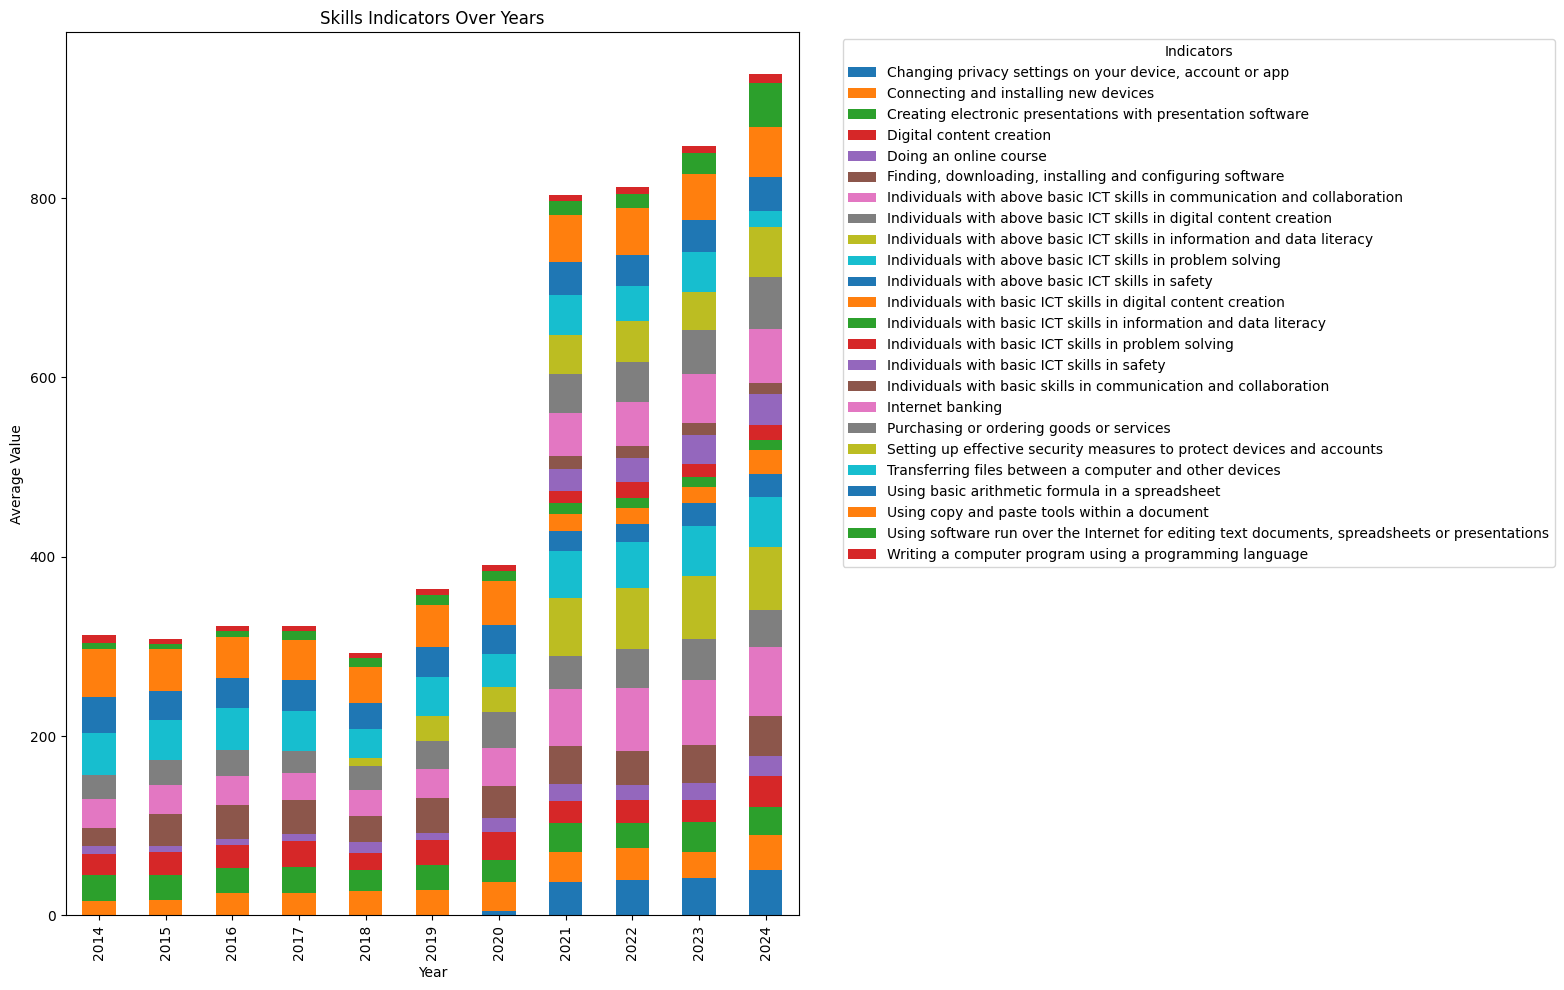

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Uploading a dataset
df = pd.read_csv('cleaned_final_dataset.csv')

# List of Skills group indicators
skills_indicators = [
    'Changing privacy settings on your device, account or app',
    'Connecting and installing new devices',
    'Creating electronic presentations with presentation software',
    'Digital content creation',
    'Doing an online course',
    'Finding, downloading, installing and configuring software',
    'Individuals with above basic ICT skills in communication and collaboration',
    'Individuals with above basic ICT skills in digital content creation',
    'Individuals with above basic ICT skills in information and data literacy',
    'Individuals with above basic ICT skills in problem solving',
    'Individuals with above basic ICT skills in safety',
    'Individuals with basic ICT skills in digital content creation',
    'Individuals with basic ICT skills in information and data literacy',
    'Individuals with basic ICT skills in problem solving',
    'Individuals with basic ICT skills in safety',
    'Individuals with basic skills in communication and collaboration',
    'Internet banking',
    'Purchasing or ordering goods or services',
    'Setting up effective security measures to protect devices and accounts',
    'Transferring files between a computer and other devices',
    'Using basic arithmetic formula in a spreadsheet',
    'Using copy and paste tools within a document',
    'Using software run over the Internet for editing text documents, spreadsheets or presentations',
    'Writing a computer program using a programming language'
]

# Filtering by Skills indicators
df_skills = df[df['Indicator'].isin(skills_indicators)]

# Creating a pivot table
pivot_skills = df_skills.pivot_table(index='Year', columns='Indicator', values='Value', aggfunc='mean')

# Building a stacked bar chart
pivot_skills.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.title('Skills Indicators Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Technical_indicators analysis




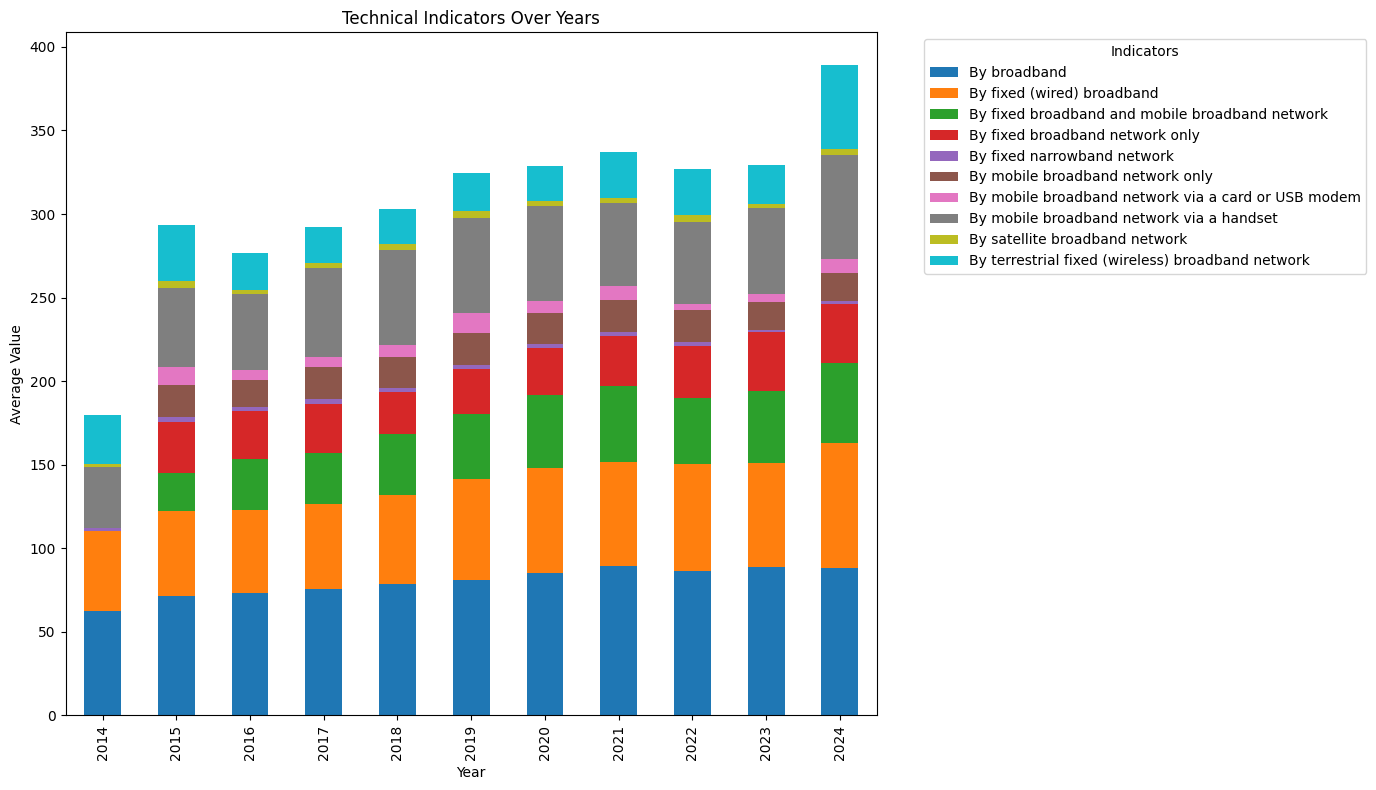

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_final_dataset.csv')

technical_indicators = [
    'By broadband',
    'By fixed (wired) broadband',
    'By fixed broadband and mobile broadband network',
    'By fixed broadband network only',
    'By fixed narrowband network',
    'By mobile broadband network only',
    'By mobile broadband network via a card or USB modem',
    'By mobile broadband network via a handset',
    'By satellite broadband network',
    'By terrestrial fixed (wireless) broadband network'
]

df_technical = df[df['Indicator'].isin(technical_indicators)]

pivot_technical = df_technical.pivot_table(index='Year', columns='Indicator', values='Value', aggfunc='mean')

pivot_technical.plot(kind='bar', stacked=True, figsize=(14,8))

plt.title('Technical Indicators Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The final and fully prepared file with processed and cleaned data is the cleaned_final_dataset.csv file.